# 2. Projekt zur Veranstaltung "Numerische Mathematik 2"


## Randwertprobleme: Finite Differenzen

### Florian Bernhard 28258717
----

###### Imports and default settings:

In [3]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sparse

sns.set()
sns.set_context('paper')
sns.set_style('whitegrid')

### Aufgabe 1.0
-------------
Die unterschiede die zwischen den Verfahren 2.Ordnung und 4.Ordnung bestehen, sind folgende:

#### Ordung des Fehlers:
Für den Verfahrensfehler einer Differentiationsformel gilt:
$|ev(h)| \leq K * h^p + O(h^{p + 1})$ für  $h -> 0$

Somit erhalten wir mit höherer Ordnung ein genaueres Ergebnis, einen kleineren Verfahrensfehler. Jedoch sollte dabei noch beachtet werden, dass dies nicht für beliebig kleine $h$ gilt, da bei dem Gesamtfehler für $h \ll 0$ Auslöschung auftreten kann und die Verringerung des Verfahrensfehler somit wieder aufgehoben wird.

#### Die Anzahl an benötigten Punkten:
Für ein Verfahren mit höherer Ordnung werden zusätzliche Punkte benötigt, was am Intervallanfang sowie Intervallende zu der reduzierung der Ordnung führt, da dort nicht mehr als 1 Punkt bekannt ist und somit auch nur ein Verfahren der Ordnung 2 verwendet werden kann.


### Aufgabe 2.0
-------------

#### Ableitungsapproximationen:

In [3]:
def second_derivative_second_order(func, xValue, hValue):
    return (func(xValue - hValue) - 2 * func(xValue) + func(xValue + hValue)) / (math.pow(hValue, 2))

In [4]:
def second_derivative_fourth_order(func, xValue, hValue):
    return (-func(xValue - 2 * hValue) + 16 * func(xValue - hValue) - 30 * func(xValue) + 16 * func(xValue + hValue) -\
            func(xValue + 2 * hValue)) / (12 * (math.pow(hValue, 2)))

In [5]:
def first_derivative_second_order(func, xValue, hValue):
    return (-func(xValue-hValue)+func(xValue+hValue))/(2*hValue)

In [33]:
def first_derivative_fourth_order(func, xValue, hValue):
    return (func(xValue-2*hValue)-8*func(xValue-hValue)+8*func(xValue+hValue)-func(xValue+2*hValue))/(12*hValue)

#### Fehleranalyse:

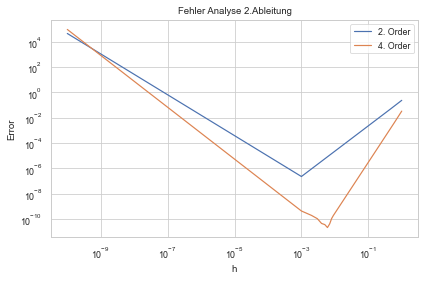

In [17]:
x0 = 1
h = np.linspace(1.0, 1.0e-10, 1000)
sDsO = []
sDfO = []
for i in range(np.size(h)):
    sDsO = np.append(sDsO, math.fabs(math.exp(x0)-second_derivative_second_order(math.exp, x0, h[i])))
    sDfO = np.append(sDfO, math.fabs(math.exp(x0)-second_derivative_fourth_order(math.exp, x0, h[i])))

plt.figure()    
plt.title('Fehler Analyse 2.Ableitung')
plt.plot(h, sDsO, label='2. Ordnung')
plt.plot(h, sDfO, label='4. Ordnung')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.tight_layout()
plt.show()

Wie aus der Grafik zu entnehmen ist, wird hier das zusammenspiel zwischen Verfahrensfehler in der rechten Hälfte und Auslöschung in der linken Hälfte klar dargestellt.

Dabei interessieren wir uns speziell für den rechten Teil der Grafik um den Verfahrensfehler graphisch abzuschätzen. 
- Der Fehler des blauen Graphen nimmt für eine Reduktion von h im Intervall [1.0e-2, 1.0] um etwa [1.0e-4] ab.
- Der Fehler des orangen Graphen nimmt für eine Reduktion von h im Intervall [1.0e-2, 1.0] um etwa [1.0e-8] ab.

In [31]:
print('h = 1.0; error = '+ str(math.fabs(math.exp(x0)-second_derivative_second_order(math.exp, x0, 1.0))))
print('h = 1.0e-2; error = '+ str(math.fabs(math.exp(x0)-second_derivative_second_order(math.exp, x0, 1.0e-2))))

h = 1.0, error = 0.23421061355351513
h = 1.0e-2, error = 2.2652423016022993e-05


In [32]:
print('h = 1.0; error = '+ str(math.fabs(math.exp(x0)-second_derivative_fourth_order(math.exp, x0, 1.0))))
print('h = 1.0e-2; error = '+ str(math.fabs(math.exp(x0)-second_derivative_fourth_order(math.exp, x0, 1.0e-2))))

h = 1.0; error = 0.033029631395715686
h = 1.0e-2; error = 2.963140843803558e-10


### Aufgabe 3.0
-------------

#### Implementierung der Funktion:  *fd_ode1*

In [4]:
def fd_ode1(aValue, bValue, cValue, xValue, yValue, nValue):
    n = nValue
    h = (xValue[1] - xValue[0]) / n

    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    A[0, 0] = 1
    b[0] = yValue[0]
    A[n, n] = 1
    b[n] = yValue[1]

    for i in range(1, n):
        t = xValue[0] + i * h

        b[i] = cValue(t)
        A[i, i - 1] = 1 / math.pow(h, 2) + aValue(t) * 1 / (2 * h)
        A[i, i] = -2 / math.pow(h, 2) - bValue(t)
        A[i, i + 1] = 1 / math.pow(h, 2) - aValue(t) * 1 / (2 * h)
    return A, b

#### Implementierung der Funktion: *fd_ode2*

In [5]:
def fd_ode2(aValue, bValue, cValue, xValue, yValue, nValue):
    n = nValue
    h = (xValue[1] - xValue[0]) / n

    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    A[0, 0] = 1
    b[0] = yValue[0]
    A[n, n] = 1
    b[n] = yValue[1]

    for i in range(1, n):
        t = xValue[0] + i * h
        if i == 1 or n - 1:
            b[i] = cValue(t)
            A[i, i - 1] = 1 / math.pow(h, 2) + aValue(t) * 1 / (2 * h)
            A[i, i] = -2 / math.pow(h, 2) - bValue(t)
            A[i, i + 1] = 1 / math.pow(h, 2) - aValue(t) * 1 / (2 * h)
        else:
            b[i] = cValue(t)
            A[i, i - 2] = -1 / (12 * math.pow(h, 2)) - aValue(t) * 1 / (12 * h)
            A[i, i - 1] = 16 / (12 * math.pow(h, 2)) + aValue(t) * 8 / (12 * h)
            A[i, i] = -30 / (12 * math.pow(h, 2)) - bValue(t)
            A[i, i + 1] = 16 / (12 * math.pow(h, 2)) - aValue(t) * 8 / (12 * h)
            A[i, i + 2] = -1 / (12 * math.pow(h, 2)) + aValue(t) * 1 / (12 * h)
    return A, b

### Aufgabe 4.0
-------------

#### Erstes Randwertproblem

##### fd_ode1

In [61]:
a = lambda x: -x/(6*math.pow(x, 2))
b = lambda x: 1/(6*math.pow(x, 2))
c = lambda x: 0

xValue = [1, 64]
yValue = [2, 12]
nValue = 63

A, b = fd_ode1(a, b, c, xValue, yValue, nValue)
sol_ode1 = np.linalg.solve(A, b)

In [62]:
x = np.ones(len(b))
w , v = np.linalg.eig(A)
sol_ode1_conj = conjugated_gradient_decent(A, x, b, 1.0e-10)
np.linalg.norm(sol_ode1-sol_ode1_conj)

37.23342792133721

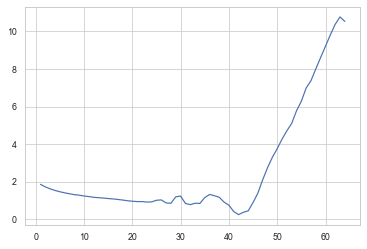

In [63]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1_conj)
plt.show()

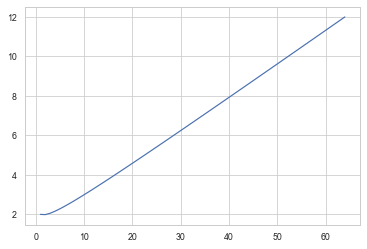

In [22]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1)
plt.show()

In [64]:
print(w)
print(max(w)/min(w))

[-2.64475760e-03 -1.02368720e-02 -2.27545951e-02 -4.01733852e-02
 -6.24543303e-02 -8.95451311e-02 -1.21380715e-01 -1.57883668e-01
 -1.98964590e-01 -2.44522418e-01 -2.94444751e-01 -3.48608178e-01
 -4.06878618e-01 -4.69111677e-01 -5.35153033e-01 -6.04838825e-01
 -6.77996081e-01 -7.54443149e-01 -8.33990161e-01 -9.16439509e-01
 -1.00158634e+00 -1.08921906e+00 -1.17911989e+00 -1.27106538e+00
 -1.36482697e+00 -1.46017158e+00 -1.55686217e+00 -1.65465836e+00
 -1.75331696e+00 -1.85259266e+00 -1.95223860e+00 -2.05200695e+00
 -2.15164959e+00 -2.25091868e+00 -2.34956732e+00 -2.44735008e+00
 -2.54402371e+00 -2.63934768e+00 -2.73308478e+00 -2.82500172e+00
 -3.99799856e+00 -3.99093403e+00 -3.97883377e+00 -3.96175878e+00
 -3.93976764e+00 -3.91292498e+00 -3.88130428e+00 -3.84498904e+00
 -3.80407321e+00 -3.75866136e+00 -3.70886868e+00 -3.65482078e+00
 -3.59665357e+00 -3.53451292e+00 -3.46855439e+00 -3.39894289e+00
 -3.32585225e+00 -3.24946487e+00 -2.91486971e+00 -3.16997125e+00
 -3.08756952e+00 -3.00246

Wie wir erkennen, unterscheiden sich die Plots maßgeblich in ihrer Darstellung. Während die Lösung des Problems mit dem Solver aus der Numpy Bibliothek die korrekte Lösung anzeigt, hat das Conjugierte Gradientenverfahren schwierigkeiten zu der Lösung zu konvergieren. Das Conjugierte Gradientenverfahren ist vorallem bei Positiv definiten System und kleiner Kondition schnell in seiner Konvergenz.

##### fd_ode2

In [65]:
a = lambda x: -x/(6*math.pow(x, 2))
b = lambda x: 1/(6*math.pow(x, 2))
c = lambda x: 0

xValue = [1, 64]
yValue = [2, 12]
nValue = 63

A, b = fd_ode2(a, b, c, xValue, yValue, nValue)
sol_ode2 = np.linalg.solve(A, b)

In [66]:
x = np.ones(len(b))
w , v = np.linalg.eig(A)
sol_ode2_conj = conjugated_gradient_decent(A, x, b, 1.0e-10)
np.linalg.norm(sol_ode2-sol_ode2_conj)

37.23342792133721

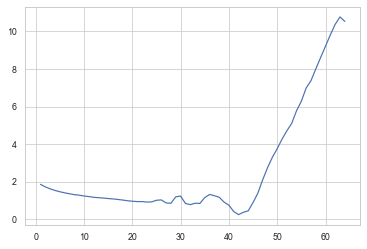

In [32]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1_conj)
plt.show()

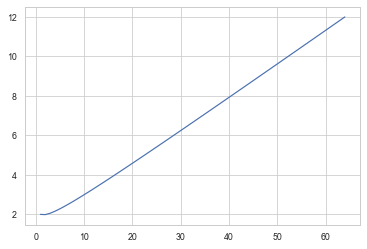

In [29]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2)
plt.show()

In [67]:
print(w)
print(max(w)/min(w))

[-2.64475760e-03 -1.02368720e-02 -2.27545951e-02 -4.01733852e-02
 -6.24543303e-02 -8.95451311e-02 -1.21380715e-01 -1.57883668e-01
 -1.98964590e-01 -2.44522418e-01 -2.94444751e-01 -3.48608178e-01
 -4.06878618e-01 -4.69111677e-01 -5.35153033e-01 -6.04838825e-01
 -6.77996081e-01 -7.54443149e-01 -8.33990161e-01 -9.16439509e-01
 -1.00158634e+00 -1.08921906e+00 -1.17911989e+00 -1.27106538e+00
 -1.36482697e+00 -1.46017158e+00 -1.55686217e+00 -1.65465836e+00
 -1.75331696e+00 -1.85259266e+00 -1.95223860e+00 -2.05200695e+00
 -2.15164959e+00 -2.25091868e+00 -2.34956732e+00 -2.44735008e+00
 -2.54402371e+00 -2.63934768e+00 -2.73308478e+00 -2.82500172e+00
 -3.99799856e+00 -3.99093403e+00 -3.97883377e+00 -3.96175878e+00
 -3.93976764e+00 -3.91292498e+00 -3.88130428e+00 -3.84498904e+00
 -3.80407321e+00 -3.75866136e+00 -3.70886868e+00 -3.65482078e+00
 -3.59665357e+00 -3.53451292e+00 -3.46855439e+00 -3.39894289e+00
 -3.32585225e+00 -3.24946487e+00 -2.91486971e+00 -3.16997125e+00
 -3.08756952e+00 -3.00246

"" ""

#### Zweites Randwertproblem

##### fd_ode1

In [68]:
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0

L = 10
xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 30

A, b = fd_ode1(a, b, c, [0, 3*(L/2)], [0, -10], nValue)
sol_ode1 = np.linalg.solve(A, b)

In [69]:
x = np.ones(len(b))
w , v = np.linalg.eig(A)
sol_ode1_conj = conjugated_gradient_decent(A, x, b, 1.0e-10)
np.linalg.norm(sol_ode1-sol_ode1_conj)

133.5067155120729

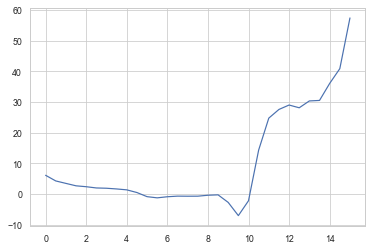

In [36]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1_conj)
plt.show()

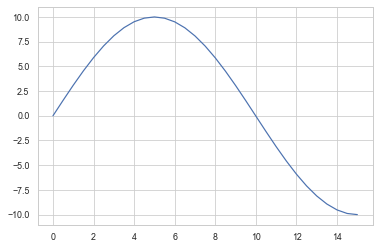

In [26]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1)
plt.show()

In [70]:
print(w)
print(max(w)/min(w))

[-15.85747912 -15.72648476 -15.50975609 -15.20966762 -14.82950719
 -14.37343991 -13.84646256 -13.25434881 -12.60358597 -11.90130396
 -11.1551971  -10.37343991  -9.56459748  -8.73753166  -7.90130396
  -7.06507625  -6.23801043  -5.429168    -4.64741081   0.05487121
  -0.07612315  -0.29285183  -0.59294029  -0.97310073  -1.429168
  -1.95614535  -2.54825911  -3.19902194  -3.90130396   1.
   1.        ]
-0.06306172579511117


"" ""

##### fd_ode2

In [71]:
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0

L = 10
xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 30

A, b = fd_ode2(a, b, c, [0, 3*(L/2)], [0, -10], nValue)
sol_ode2 = np.linalg.solve(A, b)

In [72]:
x = np.ones(len(b))
w , v = np.linalg.eig(A)
sol_ode2_conj = conjugated_gradient_decent(A, x, b, 1.0e-10)
np.linalg.norm(sol_ode1-sol_ode2_conj)

133.5067155120729

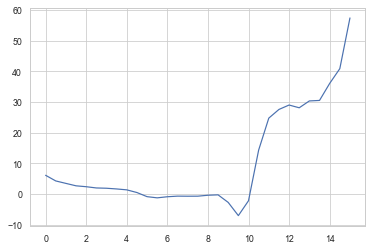

In [73]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2_conj)
plt.show()

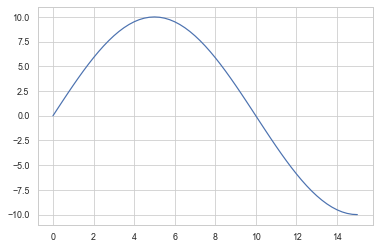

In [34]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2)
plt.show()

In [74]:
print(w)
print(max(w)/min(w))

[-15.85747912 -15.72648476 -15.50975609 -15.20966762 -14.82950719
 -14.37343991 -13.84646256 -13.25434881 -12.60358597 -11.90130396
 -11.1551971  -10.37343991  -9.56459748  -8.73753166  -7.90130396
  -7.06507625  -6.23801043  -5.429168    -4.64741081   0.05487121
  -0.07612315  -0.29285183  -0.59294029  -0.97310073  -1.429168
  -1.95614535  -2.54825911  -3.19902194  -3.90130396   1.
   1.        ]
-0.06306172579511117


### Plots mit unterschiedlichen Intervallbreiten der Gitterpunkten

#### fd_ode1

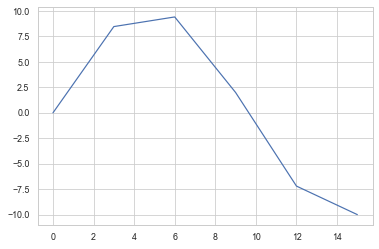

In [57]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 5

A, b = fd_ode1(a, b, c, xValue, yValue, nValue)
sol_ode1 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1)
plt.show()

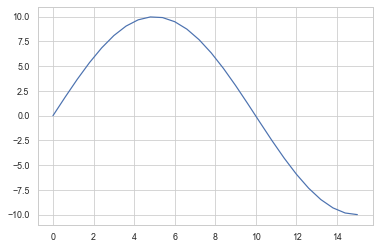

In [53]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 25

A, b = fd_ode1(a, b, c, xValue, yValue, nValue)
sol_ode1 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1)
plt.show()

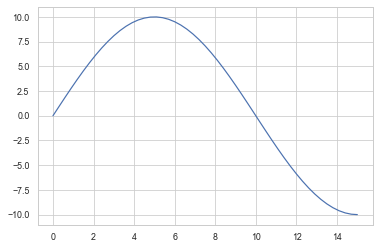

In [56]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 50

A, b = fd_ode1(a, b, c, xValue, yValue, nValue)
sol_ode1 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode1)
plt.show()

#### fd_ode2

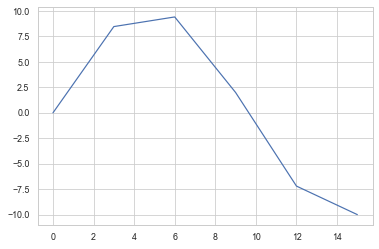

In [59]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 5

A, b = fd_ode2(a, b, c, xValue, yValue, nValue)
sol_ode2 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2)
plt.show()

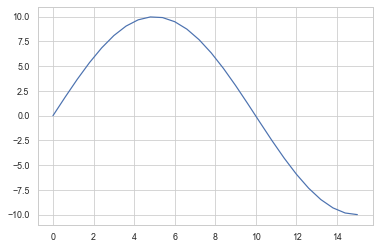

In [60]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 25

A, b = fd_ode2(a, b, c, xValue, yValue, nValue)
sol_ode2 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2)
plt.show()

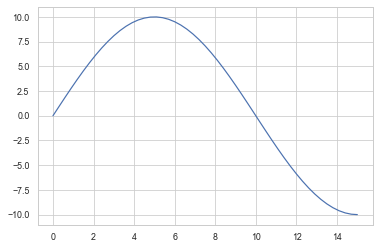

In [61]:
L = 10
a = lambda x: 0
b = lambda x: -math.pow((math.pi/L), 2)
c = lambda x: 0


xValue = [0, 3*(L/2)]
yValue = [0, -10]
nValue = 50

A, b = fd_ode2(a, b, c, xValue, yValue, nValue)
sol_ode2 = np.linalg.solve(A, b)
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode2)
plt.show()

### Aufgabe 5.0
-------------

#### fd_ode3

In [50]:
def fd_ode3(aValue, bValue, cValue, xValue, yValue, nValue, derivative):
    n = nValue
    h = (xValue[1] - xValue[0]) / n

    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    if derivative[0] is True:
        A[0, 0] = -1
        A[0, 1] = 1
        b[0] = yValue[0] * h
    else:
        A[0, 0] = 1
        b[0] = yValue[0]

    if derivative[1] is True:
        A[n, n] = 1
        A[n, n - 1] = -1
        b[n] = yValue[1] * h
    else:
        A[n, n] = 1
        b[n] = yValue[1]

    for i in range(1, n):
        t = xValue[0] + i * h

        b[i] = cValue(t)
        A[i, i - 1] = 1 / math.pow(h, 2) + aValue(t) * 1 / (2 * h)
        A[i, i] = -2 / math.pow(h, 2) - bValue(t)
        A[i, i + 1] = 1 / math.pow(h, 2) - aValue(t) * 1 / (2 * h)
    return A, b

### Aufgabe 6.0
-------------

In [75]:
L = 10

a = lambda x: 0
b = lambda x: 0
c = lambda x: -math.sin((2*math.pi*x)/L)


xValue = [0, L]
yValue = [0, 0]
nValue = 20

A, b = fd_ode3(a, b, c, xValue, yValue, nValue, [True, True])
sol_ode3 = np.linalg.lstsq(A, b, rcond=None)[0]

In [76]:
sol_ode3

array([ 7.89218939e+00,  7.89218939e+00,  7.81493514e+00,  7.59073458e+00,
        7.16427977e+00,  6.50006083e+00,  5.58584189e+00,  4.43385883e+00,
        3.07962151e+00,  1.57843788e+00, -2.09789072e-14, -1.57843788e+00,
       -3.07962151e+00, -4.43385883e+00, -5.58584189e+00, -6.50006083e+00,
       -7.16427977e+00, -7.59073458e+00, -7.81493514e+00, -7.89218939e+00,
       -7.89218939e+00])

In [77]:
x = np.ones(len(b))
w , v = np.linalg.eig(A)
sol_ode3_conj = conjugated_gradient_decent(A, x, b, 1.0e-10)
np.linalg.norm(sol_ode3-sol_ode3_conj)

<ipython-input-14-a863b679155b>:10: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = -np.dot(r, d)/np.dot(d, Ad)
<ipython-input-14-a863b679155b>:16: RuntimeWarning: invalid value encountered in add
  d = -r + beta * d


nan

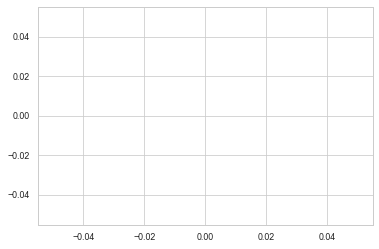

In [78]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode3_conj)
plt.show()

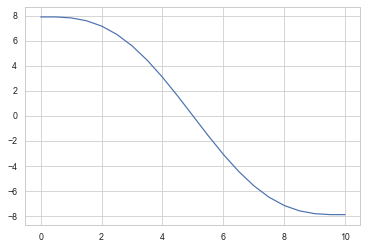

In [89]:
t = np.linspace(xValue[0], xValue[1], nValue + 1)
plt.plot(t, sol_ode3)
plt.show()

In [79]:
print(w)
print(max(w)/min(w))

[-1.59016629e+01 -1.56090726e+01 -1.51294333e+01 -1.44745540e+01
 -1.36605586e+01 -1.27074879e+01 -1.16388064e+01 -1.04808240e+01
 -9.26204740e+00 -8.01247707e+00 -6.76286691e+00 -5.54396339e+00
 -4.38574209e+00 -3.31665650e+00 -2.36290888e+00 -1.54773824e+00
 -8.90682875e-01 -4.06718731e-01 -1.05784689e-01  1.26973836e-15
  1.99986536e-01]
-0.01257645429785178


In diesem Fall erhalten wir leider eine Singuläre Matrix, für die wir keine Exakte Lösung des Problems bestimmen können. Stattdessen wenden wir das Least Squares Problem darauf an, um somit die beste Approximation der Lösung, durch minimierung des Fehlers zu erhalten.

Wenn wir unsere Lösung betrachten und  dies mit unseren Angaben vergleichen, finden wir übereinstimmungen.
Der Anfang sowie das Ende, wie aus dem Graphen zu entnehmen sind, weißen eine Steigung -> 0 auf.

### Aufgabe 7.0
-------------

#### Conjugiertes Gradienten - Verfahren

In [14]:
def conjugated_gradient_decent(A, x, b, tol):
    k = 0
    max_it = 100
    err = 2 * tol

    r = -b + A.dot(x)
    d = b - A.dot(x)
    while (err > tol) and (k < max_it):
        Ad = A.dot(d)
        alpha = -np.dot(r, d)/np.dot(d, Ad)
        x = x + alpha * d

        r_prev = r
        r = r + alpha * Ad
        beta = (np.linalg.norm(r)**2) / (np.linalg.norm(r_prev)**2)
        d = -r + beta * d
        err = np.linalg.norm(r)
        k = k + 1
    return x

### Aufgabe 8.0
-------------

#### Implementierung der vorgegebenen Matrix

In [4]:
n = 50

lower = np.ones(n)*-4
mid = np.ones(n)*20
upper = np.ones(n)*-4

data = np.vstack((lower, (mid, upper)))
diags = np.array([-1, 0, 1])
first_tridiag = sparse.spdiags(data, diags, n, n).toarray()

lower = np.ones(n)*-1
mid = np.ones(n)*0
upper = np.ones(n)*-1

data = np.vstack((lower, (mid, upper)))
diags = np.array([-1, 0, 1])
second_tridiag = sparse.spdiags(data, diags, n, n).toarray()

lower = np.ones(n)*-1
mid = np.ones(n)*-4
upper = np.ones(n)*-1

data = np.vstack((lower, (mid, upper)))
diags = np.array([-1, 0, 1])
third_tridiag = sparse.spdiags(data, diags, n, n).toarray()


A = (math.pow(n, 2)/6)*((sparse.kron(sparse.eye(n), first_tridiag).toarray())+(sparse.kron(second_tridiag, third_tridiag).toarray()))
b = np.ones(len(A))

#### Linalg Solve Verfahren  vs Conjugiertem Gradienten Verfahren

In [5]:
tol = 1.0e-10
x = np.ones(len(A))

tic = time.perf_counter()
sol_conjugated_gradient_decent = conjugated_gradient_decent(A, b, x, tol)
toc = time.perf_counter()

time_conjugated_gradient_decent = abs(toc - tic)

In [6]:
sol_conjugated_gradient_decent

array([0.02022912, 0.02358713, 0.02358713, 0.02022912, 0.01291097,
       0.01312229, 0.01312229, 0.01291097, 0.01291097, 0.01312229,
       0.01312229, 0.01291097, 0.02022912, 0.02358713, 0.02358713,
       0.02022912])

In [75]:
time_conjugated_gradient_decent

0.0006144199996924726

In [76]:
tic = time.perf_counter()
sol_linalg_solve = np.linalg.solve(A, b)
toc = time.perf_counter()

time_linalg_solve = abs(toc -tic)

In [77]:
sol_linalg_solve

array([0.02022912, 0.02358713, 0.02358713, 0.02022912, 0.01291097,
       0.01312229, 0.01312229, 0.01291097, 0.01291097, 0.01312229,
       0.01312229, 0.01291097, 0.02022912, 0.02358713, 0.02358713,
       0.02022912])

In [78]:
time_linalg_solve

0.00017073100025299937

In [79]:
time_linalg_solve/time_conjugated_gradient_decent

0.2778734421705886

#### Durschnittliche Zeitdifferenz der beiden Verfahren

In [82]:
count = 0
time_conjGrad = []
time_linalgSol = []
for i in range(1, 20):

    n = i

    lower = np.ones(n)*-4
    mid = np.ones(n)*20
    upper = np.ones(n)*-4

    data = np.vstack((lower, (mid, upper)))
    diags = np.array([-1, 0, 1])
    first_tridiag = sparse.spdiags(data, diags, n, n).toarray()

    lower = np.ones(n)*-1
    mid = np.ones(n)*0
    upper = np.ones(n)*-1

    data = np.vstack((lower, (mid, upper)))
    diags = np.array([-1, 0, 1])
    second_tridiag = sparse.spdiags(data, diags, n, n).toarray()

    lower = np.ones(n)*-1
    mid = np.ones(n)*-4
    upper = np.ones(n)*-1

    data = np.vstack((lower, (mid, upper)))
    diags = np.array([-1, 0, 1])
    third_tridiag = sparse.spdiags(data, diags, n, n).toarray()


    A = (math.pow(n, 2)/6)*((sparse.kron(sparse.eye(n), first_tridiag).toarray())+(sparse.kron(second_tridiag, third_tridiag).toarray()))
    b = np.ones(len(A))

    tic = time.perf_counter()
    np.linalg.solve(A, b)
    toc = time.perf_counter()
    time_linalg = abs(toc-tic)

    x = np.ones(len(A))
    tic = time.perf_counter()
    conjugated_gradient_decent(A, b, x, 1.0e-10)
    toc = time.perf_counter()
    time_conjgrad = abs(tic-toc)

    count = count + 1

    time_conjGrad = np.append(time_conjGrad, time_conjgrad)
    time_linalgSol = np.append(time_linalgSol, time_linalg)


In [83]:
(sum(time_linalgSol)/count)/(sum(time_conjGrad)/count)

0.40286552708074747

Das konjugierte Gradienten - Verfahren konvergiert unter der berückstichtigung einer geeigneten Wahl für x0 mit nur wenigen Iterationen gegen die Lösung des Systems. Dabei ist das Verfahren im Durschnitt nur 0.5 - 0.2 langsamer als der Solver der Numpy Bibliothek linalg.solve(). Die Konvergenz ist abhängig von der Definitheit des Systems und die der Größe des Bruchs zwischen größten und kleinsten Eigenwert.